In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import math
from scipy.stats import norm

### HPO of the architectures

In [50]:
import pandas as pd
import os

file_path = '../protein_ARCH_HPO_results.csv'
dataset_name = os.path.splitext(os.path.basename(file_path))[0]
if "dna" in dataset_name:
    no_features = 3
    no_classes = 180
    d_name = "dna"
    no_params = 1314560 + 1024*no_features + 256*no_classes
elif "splice" in dataset_name:
    no_features = 2
    no_classes = 60
    d_name = "splice"
    no_params = 1314560 + 1024*no_features + 256*no_classes
elif "protein" in dataset_name:
    no_features = 3
    no_classes = 357
    d_name = "protein"
    no_params = 1314560 + 1024*no_features + 256*no_classes
else:
    no_features = 2
    no_classes = 2
    d_name = "twomoons"
    no_params = 1314560 + 1024*no_features + 256*no_classes
df = pd.read_csv(file_path, index_col=None, header=0)
df['no_params'] = (df['params_no_blocks'] - 1)*(df['params_small_hidden_size']*df['params_big_hidden_size']*2 + df['params_small_hidden_size'] + df['params_big_hidden_size'])\
    + (df['params_small_hidden_size']*df['params_big_hidden_size'] + df['params_big_hidden_size']*no_features + df['params_small_hidden_size'] + df['params_big_hidden_size'])\
    + (df['params_small_hidden_size']*no_classes + no_classes)
df = df[df['value']<2]


FileNotFoundError: [Errno 2] No such file or directory: '../protein_ARCH_HPO_results.csv'

In [51]:
df.iloc[df.idxmin()['value']]

number                                             460
value                                         0.698212
datetime_start              2024-12-05 01:40:24.432816
datetime_complete           2024-12-05 01:40:37.243407
duration                        0 days 00:00:12.810591
params_big_hidden_size                               9
params_learning_rate                          0.002277
params_no_blocks                                     1
params_small_hidden_size                             6
state                                         COMPLETE
no_params                                         2595
Name: 460, dtype: object

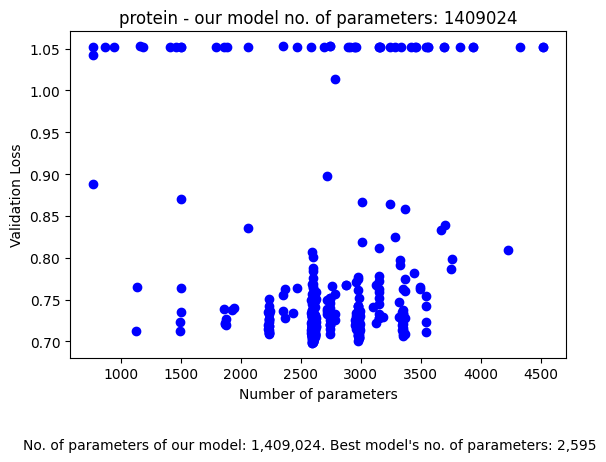

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(df['no_params'], df['value'], c='blue')
ax.set_xlabel('Number of parameters')
ax.set_ylabel('Validation Loss')
ax.set_title(f'{d_name} - our model no. of parameters: {no_params}')
best_no_params = df.iloc[df.idxmin()['value']]['no_params']
# Adjust the layout to make room for the caption
plt.subplots_adjust(bottom=0.2)
caption = (f'No. of parameters of our model: {no_params:,}. Best model\'s no. of parameters: {best_no_params:,}')
fig.text(0.5, 0.01, caption, ha='center', fontsize=10)
plt.show()

### under-fiting thing

In [16]:
df_dna = pd.read_csv('../dna_l2_results.csv', header=0, index_col=None)
df_dna = df_dna.drop(columns=[
    "dataset_name", "reg_type", "reg_val", "data_size_pct", "lr", "seed"
])
df_dna = df_dna.mean().reset_index()
df_dna.head()

,index,0
0,loss,0.275554
1,val_acc,0.925956
2,train_loss,0.009643
3,train_acc,0.996947


In [17]:
df_pro = pd.read_csv('../protein_l2_results.csv', header=0, index_col=None)
df_pro = df_pro.drop(columns=[
    "dataset_name", "reg_type", "reg_val", "data_size_pct", "lr", "seed"
])
df_pro = df_pro.mean().reset_index()
df_pro.head()

,index,0
0,loss,0.753087
1,val_acc,0.670017
2,train_loss,0.022361
3,train_acc,0.992660


In [18]:
df_spli = pd.read_csv('../splice_l2_results.csv', header=0, index_col=None)
df_spli = df_spli.drop(columns=[
    "dataset_name", "reg_type", "reg_val", "data_size_pct", "lr", "seed"
])
df_spli = df_spli.mean().reset_index()
df_spli.head()

,index,0
0,loss,0.295323
1,val_acc,0.890792
2,train_loss,0.026847
3,train_acc,0.991020


In [19]:
df_moon = pd.read_csv('../twomoons_l2_results.csv', header=0, index_col=None)
df_moon = df_moon.drop(columns=[
    "dataset_name", "reg_type", "reg_val", "data_size_pct", "lr", "seed"
])
df_moon = df_moon.mean().reset_index()
df_moon.head()

,index,0
0,loss,0.082095
1,val_acc,0.965369
2,train_loss,0.083126
3,train_acc,0.968378


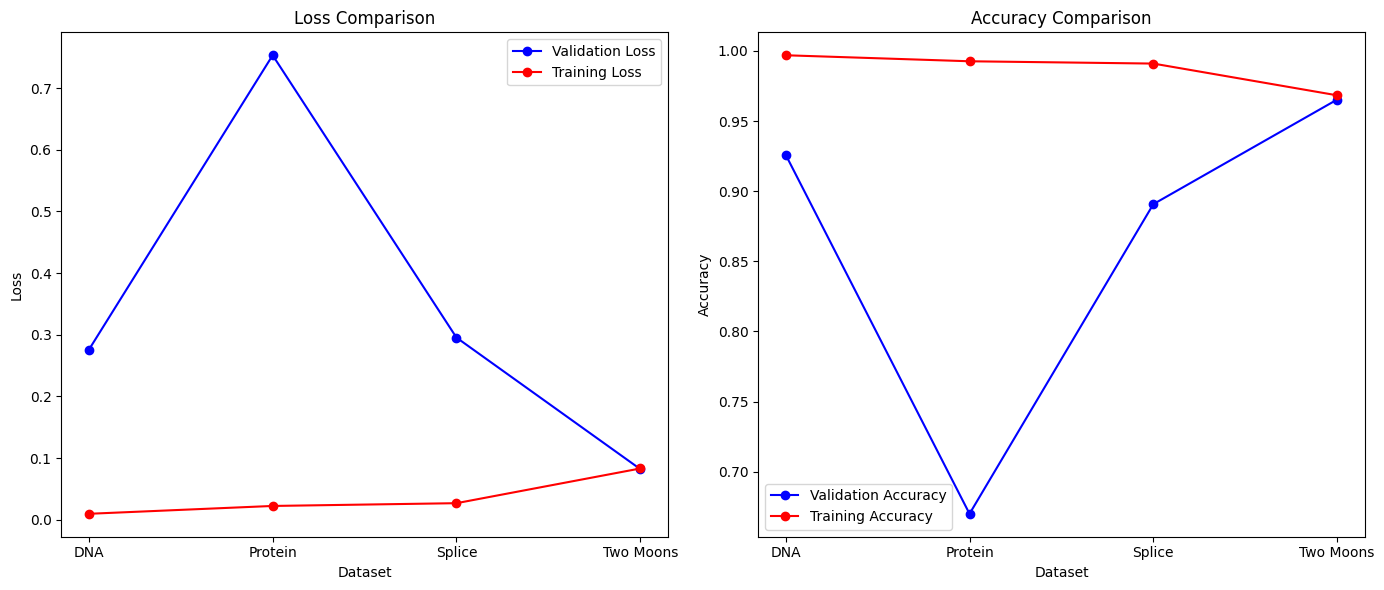

In [21]:
# Extract the loss and accuracy data from each dataframe
loss_data = {
    'Dataset': ['DNA', 'Protein', 'Splice', 'Two Moons'],
    'Validation Loss': [df_dna.loc[df_dna['index'] == 'loss', 0].values[0],
                        df_pro.loc[df_pro['index'] == 'loss', 0].values[0],
                        df_spli.loc[df_spli['index'] == 'loss', 0].values[0],
                        df_moon.loc[df_moon['index'] == 'loss', 0].values[0]],
    'Training Loss': [df_dna.loc[df_dna['index'] == 'train_loss', 0].values[0],
                    df_pro.loc[df_pro['index'] == 'train_loss', 0].values[0],
                    df_spli.loc[df_spli['index'] == 'train_loss', 0].values[0],
                    df_moon.loc[df_moon['index'] == 'train_loss', 0].values[0]]
}

acc_data = {
    'Dataset': ['DNA', 'Protein', 'Splice', 'Two Moons'],
    'Validation Accuracy': [df_dna.loc[df_dna['index'] == 'val_acc', 0].values[0],
                            df_pro.loc[df_pro['index'] == 'val_acc', 0].values[0],
                            df_spli.loc[df_spli['index'] == 'val_acc', 0].values[0],
                            df_moon.loc[df_moon['index'] == 'val_acc', 0].values[0]],
    'Training Accuracy': [df_dna.loc[df_dna['index'] == 'train_acc', 0].values[0],
                        df_pro.loc[df_pro['index'] == 'train_acc', 0].values[0],
                        df_spli.loc[df_spli['index'] == 'train_acc', 0].values[0],
                        df_moon.loc[df_moon['index'] == 'train_acc', 0].values[0]]
}

# Convert to DataFrames
df_loss = pd.DataFrame(loss_data)
df_acc = pd.DataFrame(acc_data)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Loss plot
ax[0].plot(df_loss['Dataset'], df_loss['Validation Loss'], label='Validation Loss', color='blue', marker='o')
ax[0].plot(df_loss['Dataset'], df_loss['Training Loss'], label='Training Loss', color='red', marker='o')
ax[0].set_title('Loss Comparison')
ax[0].set_xlabel('Dataset')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Accuracy plot
ax[1].plot(df_acc['Dataset'], df_acc['Validation Accuracy'], label='Validation Accuracy', color='blue', marker='o')
ax[1].plot(df_acc['Dataset'], df_acc['Training Accuracy'], label='Training Accuracy', color='red', marker='o')
ax[1].set_title('Accuracy Comparison')
ax[1].set_xlabel('Dataset')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.tight_layout()
plt.show()

### results plotting

In [12]:
# df = pd.read_csv("C:\\Users\\Amir Hossein\\Downloads\\cres\\splice_l2_results.csv", header=0, index_col=None)
# df = pd.read_csv("C:\\Users\\Amir Hossein\\Downloads\\cres\\splice_dropout_results.csv", header=0, index_col=None)

# df = pd.read_csv("C:\\Users\\Amir Hossein\\Downloads\\cres\\dna_l2_results.csv", header=0, index_col=None)
# df = pd.read_csv("C:\\Users\\Amir Hossein\\Downloads\\cres\\dna_dropout_results.csv", header=0, index_col=None)

# df = pd.read_csv("C:\\Users\\Amir Hossein\\Downloads\\cres\\twomoons_l2_results.csv", header=0, index_col=None)
# df = pd.read_csv("C:\\Users\\Amir Hossein\\Downloads\\cres\\twomoons_dropout_results.csv", header=0, index_col=None)

# df = pd.read_csv("C:\\Users\\Amir Hossein\\Downloads\\cres\\protein_l2_results.csv", header=0, index_col=None)
df = pd.read_csv("C:\\Users\\Amir Hossein\\Downloads\\cres\\protein_dropout_results.csv", header=0, index_col=None)


dataset = df.loc[df.groupby(["dataset_name", "reg_type", "reg_val", "seed", "data_size_pct"])["loss"].idxmin()].reset_index(drop=True)
dataset.head()

,dataset_name,reg_type,reg_val,loss,seed,data_size_pct,val_acc,lr
0,protein,dropout,0.0,1.027901,1,1,0.511300,0.0100
1,protein,dropout,0.0,1.041631,1,2,0.516091,0.0010
2,protein,dropout,0.0,1.021365,1,3,0.530145,0.0001
3,protein,dropout,0.0,1.008877,1,4,0.548686,0.0001
4,protein,dropout,0.0,1.024840,1,5,0.451081,0.0100


### visualization

In [13]:
dataset_name = dataset['dataset_name'].unique().item()
# print(dataset_name)

if dataset['reg_type'].unique().item() == 'l2':
    reg_type = 'l2'
    log_scale = True
    
else:
    reg_type = 'dropout'
    log_scale = False

In [14]:
def plot_3d_surface_with_avg(dataset, x_col, y_col, z_col, log_x=False, log_y=False, log_z=False):
    # Group by x and y and compute the mean of the z column
    df_grouped = dataset.groupby([x_col, y_col])[[z_col, "lr"]].mean().reset_index()

    # Pivot the grouped data to get the correct format for the surface plot
    df_pivot = df_grouped.pivot(index=y_col, columns=x_col, values=z_col)

    # Create x, y, z values for the surface plot
    x_vals = df_pivot.columns
    y_vals = df_pivot.index
    z_vals = df_pivot.values

    # Create a 3D surface plot with opacity set to 0.6 and contours on the z-axis
    surface = go.Surface(
        z=z_vals, 
        x=x_vals, 
        y=y_vals, 
        opacity=0.9, 
        colorscale='Jet',
        contours={
            "z": {
                "show": True,  # Enable contour lines on the z-axis
                # "project": {"z": True},  # Project contour lines onto the z-plane
                "color": "black",  # Color of the contour lines
                "width": 2  # Thickness of the contour lines
            }
        }
    )

    # Add a 3D scatter plot with the same data points
    scatter_data = go.Scatter3d(
        x=df_grouped[x_col], 
        y=df_grouped[y_col], 
        z=df_grouped[z_col],
        mode='markers',
        marker=dict(size=5, color=df_grouped[z_col], colorscale='Jet', opacity=0.9),
        hovertext=[
            f"{x_col}: {x}<br>{y_col}: {y}<br>{z_col}: {z}<br>Learning Rate: {lr}"
            for x, y, z, lr in zip(df_grouped[x_col], df_grouped[y_col], df_grouped[z_col], df_grouped["lr"])
        ],
        hoverinfo="text"
    )

    # Identify the row with the minimum z_col value
    min_row = df_grouped.loc[df_grouped[z_col].idxmin()]

    # Create a separate scatter trace for the minimum loss point with a black marker
    min_scatter = go.Scatter3d(
        x=[min_row[x_col]],
        y=[min_row[y_col]],
        z=[min_row[z_col]],
        mode='markers',
        marker=dict(size=8, color='red'),
        hovertext=f"Minimum {z_col}: {min_row[z_col]}<br>{x_col}: {min_row[x_col]}<br>{y_col}: {min_row[y_col]}<br>Learning Rate: {min_row['lr']}",
        hoverinfo="text"
        # name='Minimum Loss'
    )

    # Create the figure and add the surface, scatter plot, and min scatter plot
    fig = go.Figure(data=[surface, scatter_data, min_scatter])

    # Update axis types to logarithmic if requested
    axis_settings = dict(
        xaxis=dict(title=x_col, type='log' if log_x else 'linear'),
        yaxis=dict(title=y_col, type='log' if log_y else 'linear'),
        zaxis=dict(title=z_col, type='log' if log_z else 'linear')
    )

    # Update the layout for better visualization
    fig.update_layout(
        width=800,
        height=600,
        scene=dict(
            aspectratio=dict(x=1.25, y=1, z=1),
            xaxis=axis_settings['xaxis'],
            yaxis=axis_settings['yaxis'],
            zaxis=axis_settings['zaxis']
        ),
        margin=dict(l=0.5, r=0.5, b=50, t=50),
        title=f'{dataset_name.upper()}. {reg_type.upper()}. {z_col} as a function of {x_col} and {y_col})' 
    )

    # Show the plot
    fig.show()
    return fig



In [15]:
plot_3d = plot_3d_surface_with_avg(dataset, 'data_size_pct', 'reg_val', 'loss', log_x=False, log_y=log_scale, log_z=False)

In [16]:
def plot_mean_loss(df, x_axis='data_size_pct', group_by='reg_val', log_x=False):
    """
    Plots the mean loss as a function of x_axis for each unique group_by value using Plotly subplots.
    Each marker in the scatter plot is accompanied by an error bar representing the spread of the data.

    Parameters:
    - df: pandas DataFrame containing the data.
    - x_axis: column name to use for the x-axis ('data_size_pct' or 'reg_val').
    - group_by: column name to group the data by ('reg_val' or 'data_size_pct').
    - log_x: boolean indicating whether to use a log scale for the x-axis.

    Returns:
    - Plotly Figure object.
    """

    # Validate inputs
    if x_axis not in df.columns:
        raise ValueError(f"x_axis '{x_axis}' not found in DataFrame columns.")
    if group_by not in df.columns:
        raise ValueError(f"group_by '{group_by}' not found in DataFrame columns.")
    if x_axis == group_by:
        raise ValueError("x_axis and group_by must be different columns.")

    # Make a copy of the DataFrame to avoid modifying the original data
    df_plot = df.copy()

    # Option 2: Adjust x_axis to be positive by shifting if log_x is True
    shift_value = 0  # Initialize shift value
    if log_x:
        min_x = df_plot[x_axis].min()
        if min_x <= 0:
            shift_value = abs(min_x) + 1e-6  # Small constant to ensure positivity
            df_plot[x_axis] = df_plot[x_axis] + shift_value
            print(f"Shifted '{x_axis}' by {shift_value} to make all values positive for log scale.")

    # Compute mean and standard deviation of loss grouped by 'group_by' and 'x_axis'
    grouped = df_plot.groupby([group_by, x_axis])[['loss', 'lr']].agg({'loss': ['mean', 'std'], 'lr': 'mean'}).reset_index()
    grouped.columns = [group_by, x_axis, 'loss_mean', 'loss_std', 'lr_mean']


    # Get unique groups
    unique_groups = sorted(grouped[group_by].unique())

    # Determine number of subplots (n rows x 2 columns)
    n = len(unique_groups)
    cols = 2
    rows = math.ceil(n / cols)

    # Create subplot titles
    subplot_titles = [f"{group_by} = {g}" for g in unique_groups]

    # Create subplots
    fig = make_subplots(rows=rows, cols=cols, subplot_titles=subplot_titles)

    # Determine global x and y ranges
    x_min = grouped[x_axis].min()
    x_max = grouped[x_axis].max()
    y_min = grouped['loss_mean'].min()
    y_max = grouped['loss_mean'].max()

    # Add padding (5% of the range on each side for x, 15% for y)
    x_padding = (x_max - x_min) * 0.05 if x_max != x_min else 1
    y_padding = (y_max - y_min) * 0.15 if y_max != y_min else 1

    # Calculate final ranges
    if log_x:
        # For log scales, padding should be multiplicative
        x_range = [x_min / 1.1, x_max * 1.1]
    else:
        x_range = [x_min - x_padding, x_max + x_padding]
    y_range = [y_min - y_padding, y_max + y_padding]

    for i, group in enumerate(unique_groups):
        row = i // cols + 1
        col = i % cols + 1
        df_group = grouped[grouped[group_by] == group].sort_values(by=x_axis)
        fig.add_trace(
            go.Scatter(
                x=df_group[x_axis],
                y=df_group['loss_mean'],
                mode='lines+markers',
                name=str(group),
                error_y=dict(
                    type='data',
                    array=df_group['loss_std'],
                    visible=True
                ),
                hovertext=[
                    f"{x_axis}: {x}<br>Mean Loss: {loss}<br>Avg Learning Rate: {lr}"
                    for x, loss, lr in zip(df_group[x_axis], df_group['loss_mean'], df_group['lr_mean'])
                ],
                hoverinfo="text"
            ),
            row=row,
            col=col
        )


        # Set x-axis to log if needed, ensuring x_range values are positive for log scale
        if log_x:
            if x_range[0] > 0 and x_range[1] > 0:
                fig.update_xaxes(
                    type='log',
                    range=[math.log10(x_range[0]), math.log10(x_range[1])],
                    row=row,
                    col=col
                )
            else:
                raise ValueError("Cannot apply log scale to non-positive x_range values after shifting.")
        else:
            fig.update_xaxes(range=x_range, row=row, col=col)

        # Set y-axis range
        fig.update_yaxes(range=y_range, row=row, col=col)

        # Set axis titles
        fig.update_yaxes(title_text="Mean Loss", row=row, col=col)
        # Adjust x-axis title if shifted
        if log_x and shift_value != 0:
            fig.update_xaxes(title_text=f"{x_axis} + {shift_value:.2e}", row=row, col=col)
        else:
            fig.update_xaxes(title_text=x_axis, row=row, col=col)

    # If there are empty subplots, remove their annotations
    total_subplots = rows * cols
    existing_annotations = len(fig.layout.annotations)
    if n < total_subplots:
        for i in range(n, total_subplots):
            if i < existing_annotations:
                fig.layout.annotations[i].text = ''

    fig.update_layout(
        height=320*rows, 
        width=1000, 
        title_text=f"Mean Loss vs {x_axis} grouped by {group_by}",
        showlegend=False
    )
    fig.show()
    return fig


In [17]:
plot_reg_val = plot_mean_loss(dataset, x_axis='data_size_pct', group_by='reg_val', log_x=False)

In [18]:
plot_data_size_pct = plot_mean_loss(dataset, x_axis='reg_val', group_by='data_size_pct', log_x=log_scale)

In [19]:
def save_plots_to_html(plot_list, file_name):
    """
    Saves multiple Plotly plots into a single HTML file.

    Parameters:
    - plot_list: A list of variable names (strings) that refer to Plotly plot objects.
    - file_name: The name of the HTML file to save the plots.
    """
    # Initialize an empty list to store the HTML content of each plot
    html_content = []

    # Loop through the list of plot variables, render the plot and append its HTML content
    for plot_var in plot_list:
        plot = eval(plot_var)  # Evaluate the string to get the actual plot object
        html_content.append(pio.to_html(plot, full_html=False))

    # Concatenate all plots into a single HTML string
    full_html = "<html><head></head><body>" + "".join(html_content) + "</body></html>"

    # Save the HTML content to the file
    with open(file_name, "w", encoding='utf-8') as f:
        f.write(full_html)

    print(f"Plots saved to {file_name}")


In [20]:
plot_list = ['plot_3d', 'plot_reg_val', 'plot_data_size_pct']
html_filename = f'{dataset_name.upper()}_{reg_type}_plots.html'
save_plots_to_html(plot_list, html_filename)

Plots saved to PROTEIN_dropout_plots.html
